### Illustration of gradient descent in 2-D data for a polynomial regression problem

* Name: Paide Ashish
* 200101072

Gradient descent is an important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning. Therefore, getting to grips with the inner workings of gradient descent will be of great benefit to anyone planning on exploring ML algorithms further.
In this Notebook I will be walking through the steps of how the gradient descent process works, without using ML libraries such as scikit-learn for example.

### Goal of Gradient Descent — First Steps
The goal of gradient descent is to minimize the error of a model’s prediction, relative to the original data. In this article’s context, we will be looking at a second-degree polynomial model, also known as a quadratic equation:
$$y =ax^2 + bx + c$$




#### Polynomial Regression
Here, we’re specifically focusing on polynomial regression, where the relationship between the independent variable 
x and the dependent variable y is modeled as an nth degree polynomial in 
x. Simply put, the coefficients of our second degree polynomial 
a, b, and c will be estimated, evaluated, and altered until we can accurately fit a line to the input 
x data. Gradient descent is the optimization step in this process that alters and improves the values of these coefficients.

Now, let's delve into creating and plotting such a curve. Subsequently, we'll construct an initial model to fit this data, which we will then optimize and refine using gradient descent. If we can obtain a model that accurately describes the data, the expectation is that it should be capable of accurately predicting the 𝑦 values for another set of 
𝑥 values.
We can start by choosing coefficients for a second degree polynomial equation $ax^2 + bx + c$ that will effectively distribute the data we are attempting to model."

In [21]:
coeffs = [2, -5, 4]

These coefficients will serve as the basis for our ground truth model, which we aim to approximate as closely as possible with our predictive model. Next, we require an evaluation function for a second-degree polynomial. This function, when provided with a set of coefficients and a given input 
𝑥, returns the corresponding y:

In [22]:
def eval_2nd_degree(coeffs, x):
    """
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

We can see it in action when x=3:

In [23]:
coeffs = [2, -5, 4]
x=3
eval_2nd_degree(coeffs, x)

7

### Creating the data and base model
Define some x data (inputs) we hope to predict y (outputs) of:

[-1.63512745 -3.09767307 -2.35594083  1.60579098  2.240667   -7.46925189
 -2.53676998 -9.057656    9.80443645  2.43601469  2.7178625   5.19861069
  8.86679402 -0.02955362  1.53731896 -1.93368857  2.45327938  0.15982992
 -9.185198    0.06996551 -1.04132456  0.61505184 -3.10046948  8.50848131
 -3.83154469  8.22500025 -5.20479561  1.52118317 -6.38889125 -8.34041512
  6.4445484   6.48203051  2.84693074  3.50703689  8.51162413 -5.63292902
  2.84718108 -1.63384777 -7.24759809  3.62140989 -0.78185413  7.16835546
  9.98848329 -2.35908538  2.98442381  5.04551411  1.69741504  7.99307868
  8.72618589 -6.25634978  5.75236864  4.33346267 -3.43172299  2.00311067
  7.155021    1.78673906 -2.22914144  6.57413958 -2.84108251  3.20901625
 -2.79821391 -1.87599717 -8.61464862  4.69836387  4.13756837  1.83318429
  4.75121006 -7.69263828 -5.89816438 -1.11712319  2.72517633 -9.00649498
 -2.61807527 -6.66985689 -1.21454863 -6.73801921 -7.02502872  9.73284091
 -0.35279882 -2.23428727 -2.13523519  5.7941635  -5

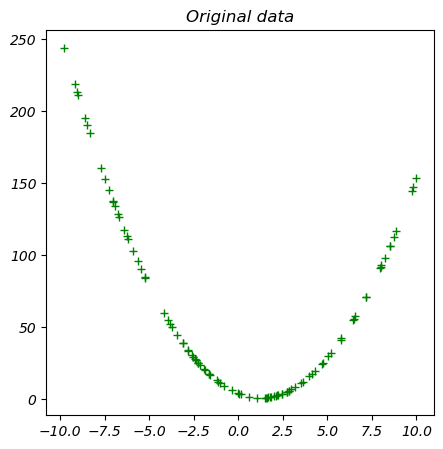

In [24]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(5,5))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or ‘jitter’ to the values so they can resemble real-world data:

In [25]:
import random
def eval_2nd_degree_jitter(coeffs, x, j):
    """"
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.
    
    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    print(y)
    
    interval = [y-j, y+j]
    interval_min = interval[0]
    interval_max = interval[1]
    print(f"Should get value in the range {interval_min} - {interval_max}")
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max 
    
    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it 
                                                  # give a number greater than the interval min. 
    
    return jit_val

Test it out:

In [26]:
x=3
j=4
eval_2nd_degree_jitter(coeffs, x, j)

7
Should get value in the range 3 - 11


8.067157295046831

This updated function will take in the inputs for the second-order polynomial and a jitter value j to add noise to this input, to give us a more realistic output than just a perfect curve:

17.522920773578683
Should get value in the range 13.522920773578683 - 21.522920773578683
38.67952232674247
Should get value in the range 34.67952232674247 - 42.67952232674247
26.88061855748544
Should get value in the range 22.88061855748544 - 30.88061855748544
1.1281744468424941
Should get value in the range -2.871825553157506 - 5.128174446842494
2.837842201955315
Should get value in the range -1.162157798044685 - 6.837842201955315
152.92570712761534
Should get value in the range 148.92570712761534 - 156.92570712761534
29.554253710602584
Should get value in the range 25.554253710602584 - 33.55425371060258
213.37054430002922
Should get value in the range 209.37054430002922 - 217.37054430002922
147.23176592444733
Should get value in the range 143.23176592444733 - 151.23176592444733
3.688261695947107
Should get value in the range -0.31173830405289316 - 7.688261695947107
5.18424061756704
Should get value in the range 1.1842406175670401 - 9.18424061756704
32.058052705500714
Should get value

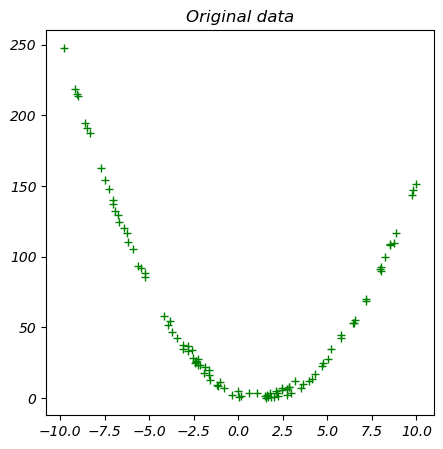

In [27]:
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(5,5))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

When we build our predictive model, and optimize it with gradient descent, hopefully we will get as close to these values as possible.

First Pass at Modeling — Trying a Random Model

The initial modeling step involves generating and storing random coefficients for a second-degree polynomial 
$(y = ax^2 + bx + c)$. This serves as our baseline model, which is expected to be inaccurate initially. However, we will iterate on it, aiming to refine it until it sufficiently fits the data.

In [43]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
rand_coeffs

(0, 4, 6)

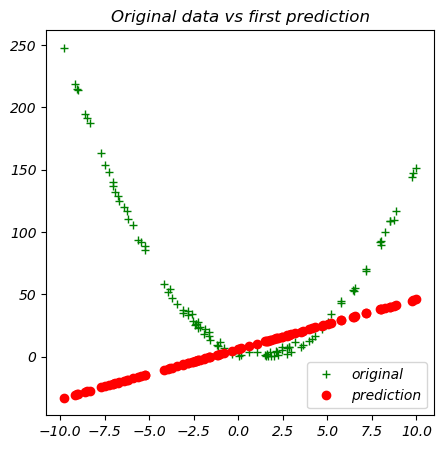

In [44]:
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(5,5))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

It's apparent from the plot above that this new model with random coefficients doesn't fit our data well. To quantify its inaccuracy, we calculate the *Mean Squared Error (MSE)* loss for the model. The MSE is the mean of the sum of squared differences between the actual and predicted outputs:
$$\text{E} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$


In [45]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.
    
    Args:
        ys: training data labels
        y_bar: prediction labels
    
    Returns: Calculated MSE loss.
    """
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)
  
initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

8396.449456644845

Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

### Gradient Descent and Loss Reduction
We wish to improve our model. Therefore, we want to alter its coefficients a, b, and c to decrease the error. Therefore, we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to each of the individual coefficients.

In this case, we are using MSE as our loss function — this is the function we wish to calculate partial derivatives for:
$$\text{E} = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2$$

With output predictions for our model as:
$$\bar{y} = ax^2 + bx + c$$

Loss can therefore be reformulated as:

$$\text{E} = \frac{1}{n} \sum_{i=0}^{n} (y_i - (ax^2 + bx + c))^2$$

In this specific case, our partial derivatives for that loss function are the following:

- Partial derivative with respect to a: $\frac{{dE}}{{da}} = \frac{-2}{n} \sum_{i=0}^{n} x_i^2(y_i - (ax_i^2 + bX_i + c))$

- Partial derivative with respect to a: $\frac{{dE}}{{db}} = \frac{-2}{n} \sum_{i=0}^{n} x_i(y_i - (ax_i^2 + bX_i + c))$

- Partial derivative with respect to a: $\frac{{dE}}{{dc}} = \frac{-2}{n} \sum_{i=0}^{n} (y_i - (ax_i^2 + bX_i + c))$

If you calculate the value of each derivative, you will obtain the gradient for each coefficient. These values represent the slope of the loss function with respect to each specific coefficient. They indicate whether you should increase or decrease it to reduce the loss, as well as by how much it should be safe to do so.






Given coefficients 𝑎, 𝑏 and 𝑐, calculated gradients 𝑔𝑎, 𝑔𝑏 and 𝑔𝑐 and a learning rate 𝑙𝑟, typically one would update the coefficients so that their new, updated values are defined as below:

- $ a_{new} = a - lr * g_a$
- $ b_{new} = b - lr * g_b$
- $ c_{new} = c - lr * g_c$

Once you have applied that new model to the data, your loss should have decreased.


### Get that loss down.
We need a gradient calculation function which, given a second-degree polynomial’s coefficients, as well as a set of inputs 𝑥 and a corresponding set of actual outputs 𝑦, will return the respective gradients for each coefficient.

In [46]:

def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    
    a_s = []
    b_s = []
    c_s = []
    
    
    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)
    
    for x,y,y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    return(gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts


We’re now going to:

- Use the above function to calculate gradients for our poor-performing random model,
- Adjust the model’s coefficients accordingly,
- Verify that the model’s loss is now smaller — that G.D. has worked!


"Let’s set an initial learning rate to experiment with. This should be kept small to avoid missing the global minimum, but not so small that it takes forever or gets stuck in a local minimum. lr = 0.0001 is a good place to start.

In [47]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")
print("")

#update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} ")

New model coeffs: (0.6251086803614079, 3.950850108759567, 6.010940265946327)

Now have smaller model loss: 5093.337328652115 


Visualize this improvement by plotting the training data, original random model and updated lower-loss model together:

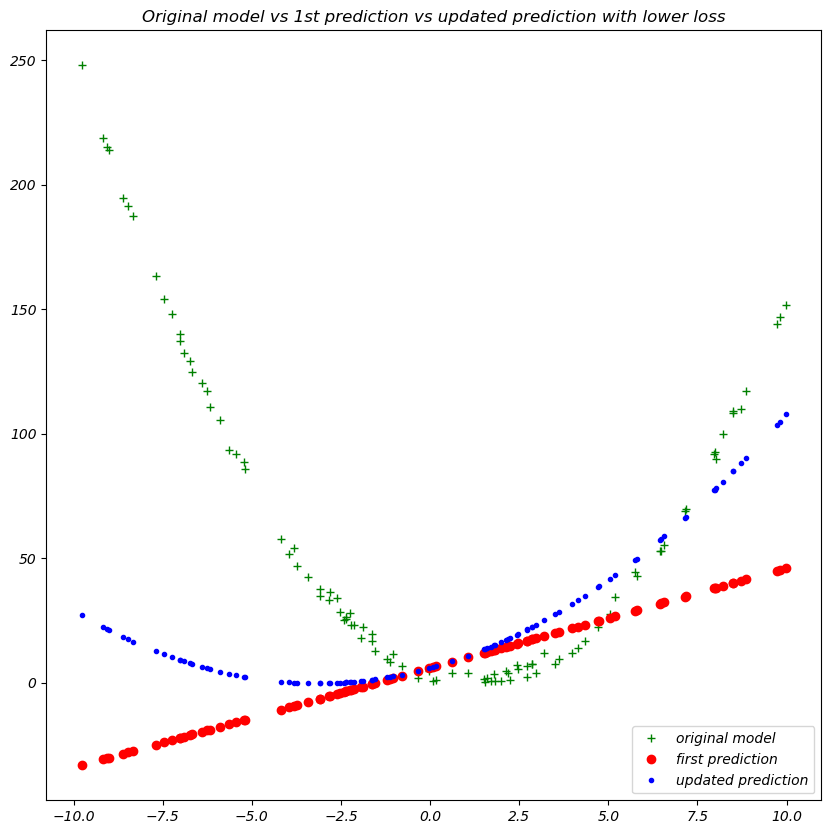

In [48]:
plt.figure(figsize=(10,10))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

### Iterative Gradient Descent over many epochs
We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations). With every epoch, we hope to see an improvement in the form of lowered loss and better model fitting to the original data.

Let’s improve on the calc_gradient_2nd_poly function from above to make it more usable for an iterative gradient descent process:

In [49]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

This will be called as part of the gradient_descent function:

In [50]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

Finally, let’s train for 1500 epochs and see if our model has learned anything:



[5093.337328652115, 3562.903853635149, 2846.512175243717, 2504.0239682407146, 2333.357874399176, 2241.731061089747, 2186.542676552102, 2148.2318168187403, 2117.81587103427, 2091.1690325736045, 2066.3954058028366, 2042.6229268802979, 2019.4496193934947, 1996.6893548769265, 1974.2551242668105, 1952.1054444142076, 1930.2197516434442, 1908.5871040631166, 1887.2009942939358, 1866.056967659259, 1845.1515284429288, 1824.4816375363587, 1804.044481610816, 1783.8373669564362, 1763.8576705612256, 1744.1028174725338, 1724.570270227531, 1705.257523826877, 1686.1621032553621, 1667.2815621738805, 1648.613482151092, 1630.1554721447674, 1611.9051680996301, 1593.8602326005273, 1576.0183545528478, 1558.377248877226, 1540.934656212616, 1523.6883426249558, 1506.6360993201497, 1489.7757423607543, 1473.1051123860732, 1456.6220743355, 1440.3245171750286, 1424.2103536268467, 1408.277519901995, 1392.5239754360382, 1376.9477026277038, 1361.546706580476, 1346.319014847084, 1331.2626771768767, 1316.3757652660393, 

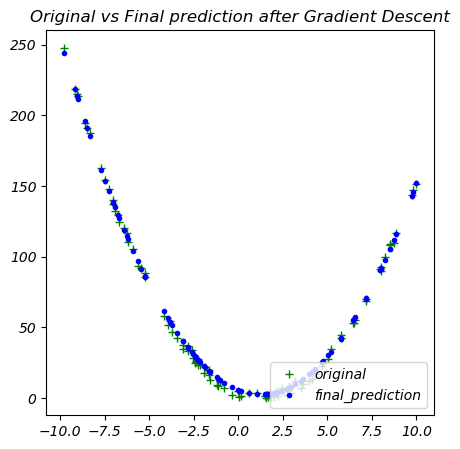

In [51]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(5,5))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients a,b and c:

In [52]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (1.9750816071343533, -5.079923040708047, 5.69709441524658)
Original Coefficients: [2, -5, 4]


Looking at the plot of the loss reduction over training offers further insights:

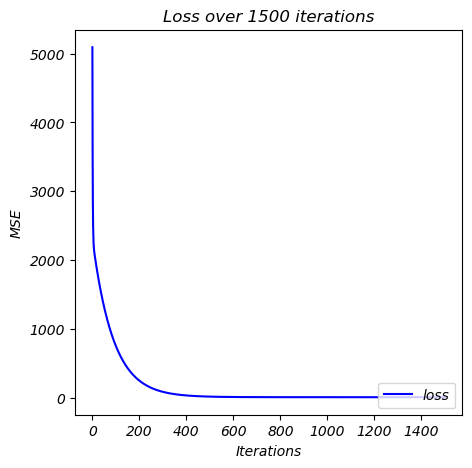

In [53]:
plt.figure(figsize=(5,5))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, giving us our more accurate coefficients. We can also see that there was no major improvement in loss after about 400 epochs — definitely no need for 1500 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential overfitting for the model.

$$--** Thank You **-- $$